## Создание признаков

Новые признаки могут быть сконструированы двумя способами: 

- с помощью внешних источников данных;
- из существующего набора данных.

In [45]:
import pandas as pd

In [46]:
wine_df=pd.read_csv('data/wine_cleared.csv')
wine_df.drop(['Unnamed: 0'], axis=1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## Разбор числовых величин

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [47]:
# для удобства сразу преобразуем признак в int
wine_df['price_round'] = wine_df['price'].round().astype(int)

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

## Разбор текста

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.

**Регулярные выражения** (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее.

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

In [48]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_df['year'] = wine_df['title'].str.findall(regex).str.get(0)

Разберём регулярное выражение \d+:

- \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];

- {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает четырехзначных чисел в заданной строке.

## Разбор категорий

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [49]:
wine_df['is_usa'] = wine_df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [50]:
wine_df['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [51]:
wine_df['is_france']=wine_df['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_df['is_italy']=wine_df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [52]:
wine_df['is_france'].sum()

22093

In [53]:
wine_df['is_italy'].sum()

19540

In [54]:
wine_df.drop(['Unnamed: 0'], axis=1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,75,2004,1,0,0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0


In [55]:
# преобразуем признак year в объект datetime для удобного сравнения дат
wine_df['year'] = pd.to_datetime(wine_df['year'], errors='coerce')

In [56]:
# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
wine_df['old_wine'] = wine_df['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
wine_df['old_wine'].sum()

39765

In [57]:
regex1='\((.*?)\)'
wine_df['locality']=wine_df['title'].str.findall(regex1).str.get(0)

In [58]:
wine_df['locality']

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

## Внешние источники данных

**Внешние источники данных** — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Внешняя информация бывает общая и профильная.

Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 

Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

In [59]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [60]:
country_population[country_population['country']=='Italy']['population']

24    59,097,904
Name: population, dtype: object

In [61]:
wine_df=wine_df.join(country_population.set_index('country'), on='country')

In [62]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [63]:
wine_df=wine_df.join(country_area.set_index('country'), on='country')


In [64]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0


In [65]:
wine_df[wine_df['country']=='US']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,...,Kirkland Signature,19,2011-01-01,1,0,0,0,Napa Valley,"333,022,386",9372610.0
12,12,US,"Slightly reduced, this wine offers a chalky, t...",unknown,87,34.0,California,Alexander Valley,Virginie Boone,@vboone,...,Louis M. Martini,34,2012-01-01,1,0,0,0,Alexander Valley,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Matt Kettmann,@mattkettmann,...,Birichino,20,2013-01-01,1,0,0,0,Santa Ynez Valley,"333,022,386",9372610.0
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Virginie Boone,@vboone,...,Flora Springs,35,2013-01-01,1,0,0,0,Napa Valley,"333,022,386",9372610.0
129950,129950,US,This opens with herbaceous dollops of thyme an...,Blocks 7 & 22,90,35.0,California,Napa Valley,Virginie Boone,@vboone,...,Hendry,35,2012-01-01,1,0,0,0,Napa Valley,"333,022,386",9372610.0
129952,129952,US,This Zinfandel from the eastern section of Nap...,unknown,90,22.0,California,Chiles Valley,Virginie Boone,@vboone,...,Houdini,22,2011-01-01,1,0,0,0,Chiles Valley,"333,022,386",9372610.0


## Работы с форматом "дата-время"

Чтобы не потерять важную информацию, заключённую в формате даты и времени, необходимо преобразовать эту информацию таким образом, чтобы признак был в формате числа, а не строки. 

Помимо разницы в датах вы можете подмечать, в какое время суток произошло некое событие: день, вечер, ночь. 

client_id — идентификатор клиента в базе;

agent_date — время соединения с агентом;

created_at — время соединения с клиентом (начало разговора);

end_date — время окончания соединения с клиентом (конец разговора).

In [66]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [67]:
# сколько времени длился разговор с клиентом
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [68]:
calls['time_connection']=(calls['created_at']-calls['agent_date']).dt.seconds

In [69]:
calls['time_connection'].sum()

89

In [70]:
calls['is_connection']=calls['duration'].apply(lambda x: 1 if x > 10 else 0)

In [71]:
calls['is_connection'].sum()

7

In [72]:
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0


In [73]:
calls['time_diff']=(calls['end_date']-calls['agent_date']).dt.seconds

In [74]:
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection,time_diff
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0,6
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1,233
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0,9
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1,216
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1,100
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1,94
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1,95
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0,72


In [75]:
calls['time_diff'].sum()

1144

In [76]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [77]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


In [78]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0


In [79]:
wine_df['years_diff']=(pd.to_datetime('2022-01-12')-wine_df['year']).dt.days

In [80]:
wine_df['years_diff'].max()

98627.0

## Кодирование признаков

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется **кодированием признаков**.

Если признак, который вы собираетесь кодировать, порядковый, используйте **порядковое кодирование** (Ordinal Encoding). 

Для **номинальных признаков** важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных **однократное кодирование** (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например **бинарный** (Binary Encoding).

In [81]:
import category_encoders as ce

In [82]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


### Порядковое кодирование

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Выполним теперь кодирование порядкового признака size и type признака в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

In [83]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing['size'])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [84]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(wine_df['year'])
wine_df = pd.concat([wine_df, year_col], axis=1)

### Однократное коидирование

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [85]:
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [86]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_1,type_2,type_3,type_4
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

clothing_dummies = pd.get_dummies(clothing, columns=['type'])

Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными.

In [88]:
encoder1 = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin1 = encoder1.fit_transform(wine_df['taster_name'])
wine_df = pd.concat([wine_df, type_bin1], axis=1)

In [89]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,0,0,0,0,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0


### Двоичное кодирование

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодирования мы сгенерируем всего 7 признаков.

Пошаговый алгоритм двоичного кодирования можно описать так: 

- значения признака кодируются в некоторый числовой порядок;
- целые числа кодируются в двоичный код;
- цифры двоичного представления формируют новые столбцы.

In [90]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_1,type_2,type_3,type_4,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [91]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder2 = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin2 = bin_encoder2.fit_transform(wine_df['country'])
wine_df = pd.concat([wine_df, type_bin2], axis=1)

wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_17,taster_name_18,taster_name_19,taster_name_20,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,0,0,0,1,1,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,1,0,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,1,0,1


In [92]:
wine_df['taster_twitter_handle'].nunique()

16

In [93]:
bin_encoder3 = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin3 = bin_encoder3.fit_transform(wine_df['taster_twitter_handle'])
wine_df = pd.concat([wine_df, type_bin3], axis=1)

In [94]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,0,0,1,1,0,0,0,1,0,0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,0,0,1,0,1,0,0,0,1,0


In [96]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


# Преобразование признаков. Нормализация. Стандартизация

Операции нормализации и стандартизации также часто называют шкалированием. 

Признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков.

## Нормализация

**Нормализация** — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 

Существует несколько способов нормализации: MinMaxScaler, RobustScaler.

In [97]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности.

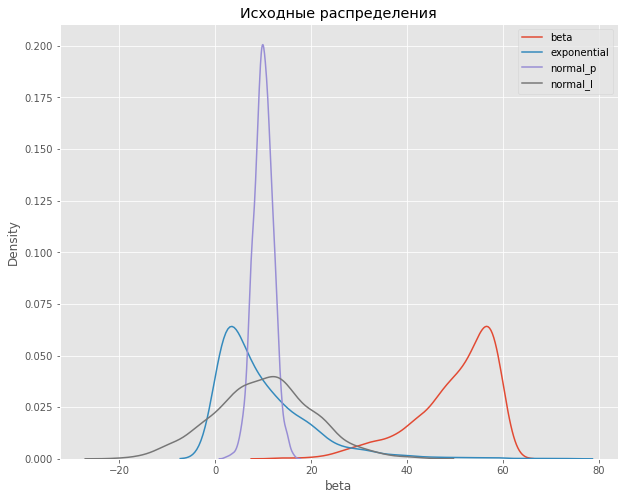

In [98]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.

In [99]:
# Зафиксируем описательные статистики до преобразований.
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


### MINMAXSCALER

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

- Из каждого значения признака х вычитается минимальное значение этого признака:  x -min
- Результат вычитания делится на разность между максимумом и минимумом признака: max-min

Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. 

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

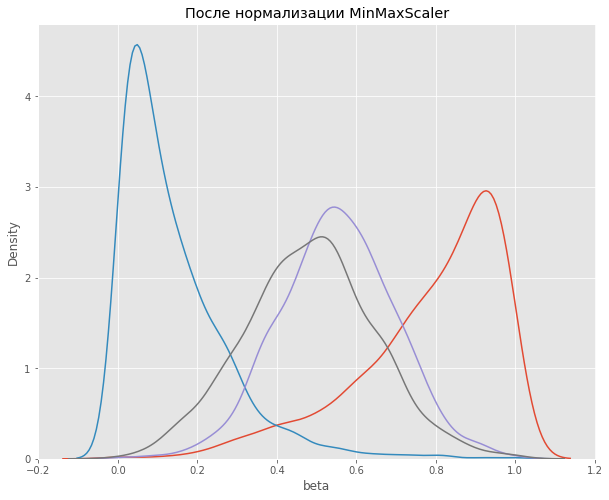

In [100]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

### ROBUSTSCALER

Нормализация методом RobustScaler происходит в несколько этапов:

- из каждого значения признака вычитается медиана признака: x-медиана
- полученное значение делится на межквартильный размах: значение 75% - значение 25%


Проведём нормализацию распределений признаков из обучающего примера, используя класс RobustScaler.

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

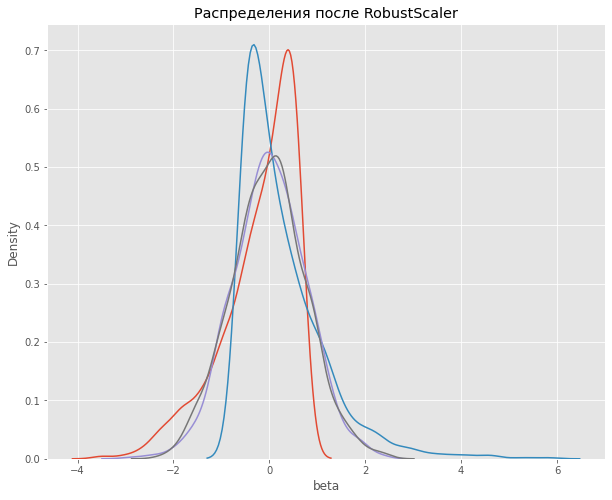

In [101]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

Из описательных статистик видно, что RobustScaler не масштабирует данные в заданный интервал, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

**Разница**

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

## СТАНДАРТИЗАЦИЯ 

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

X=(x-xср.)/x стд, где х стд - страндартное отклонение

Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

### STANDARDSCALER

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

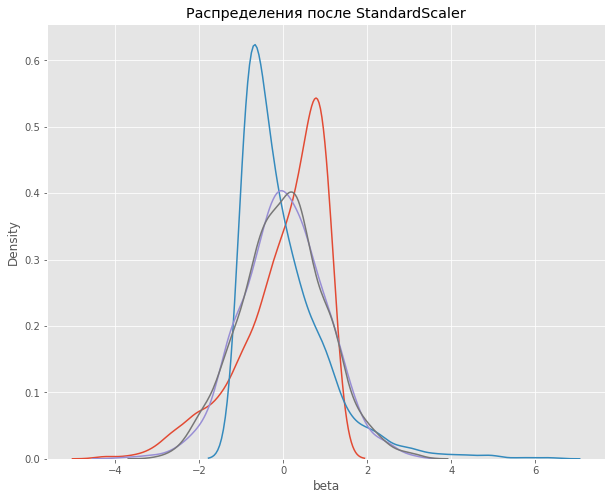

In [102]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более нормальными.

Однако мы составили небольшую инструкцию по преобразованию признаков:

- если признак распределён нормально, то его необходимо стандартизировать;
- если признак распределён ненормально, его необходимо нормализовать;
- если разброс значений небольшой, то можно обойтись без преобразования данных.

Выбор определённого способа преобразования и его необходимости может быть нелёгкой задачей, поэтому пробуйте делать различные преобразования и оценивайте результаты на конкретной модели, смотрите, есть ли разница в улучшении качества модели. О том, как сравнивать модели, вы узнаете далее в курсе в модулях про машинное обучение.

<AxesSubplot:>

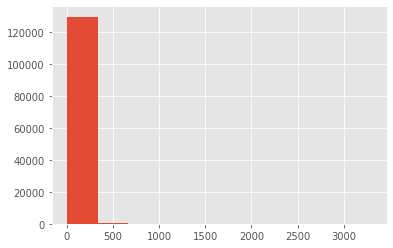

In [103]:
wine_df['price'].hist()

In [108]:
r_scaler1 = preprocessing.RobustScaler()
wine_df['price_norm']=r_scaler1.fit_transform(wine_df[['price']])

In [111]:
round(wine_df['price_norm'].sum())

43501

In [112]:
s_scaler1 = preprocessing.StandardScaler()
wine_df['price_stand']=s_scaler1.fit_transform(wine_df[['price']])

In [114]:
round(wine_df['price_stand'][129968], 2)

-0.14

# Отбор признаков. Мультиколлинеарность

Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

sepal length — длина наружной доли околоцветника;

sepal width — ширина наружной доли околоцветника;

petal length — длина внутренней доли околоцветника;

petal width — ширина внутренней доли околоцветника

In [115]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

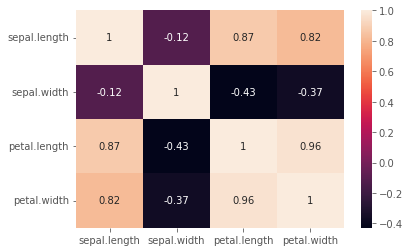

In [116]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [117]:
iris = iris.drop(['petal.width'], axis=1)

In [118]:
iris = iris.drop(['petal.length'], axis=1)

In [121]:
wine_df.corr()

,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,old_wine,area,years_diff,...,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4,price_norm,price_stand
Unnamed: 0,1.000000,0.007125,0.004648,0.004662,0.010928,-0.002187,-0.010178,-0.020657,0.011775,-0.016941,...,-0.001534,0.010816,0.002517,-0.001707,0.012235,-0.001283,-0.000425,0.003705,0.004648,0.004648
points,0.007125,1.000000,0.402136,0.402064,0.032592,0.059248,0.015926,-0.046069,0.023427,-0.034794,...,-0.019548,0.031306,0.062680,-0.001372,0.050516,-0.140644,0.183248,0.030899,0.402136,0.402136
price,0.004648,0.402136,1.000000,0.999997,0.025873,0.053139,0.039566,0.055670,0.021446,0.052737,...,0.003017,-0.016842,0.085449,-0.001035,-0.051194,-0.022783,0.058051,-0.056477,1.000000,1.000000
price_round,0.004662,0.402064,0.999997,1.000000,0.026379,0.052615,0.039314,0.055568,0.021984,0.052654,...,0.002713,-0.016389,0.085427,-0.001031,-0.051023,-0.022453,0.057807,-0.056189,0.999997,0.999997
is_usa,0.010928,0.032592,0.025873,0.026379,1.000000,-0.384584,-0.357477,-0.007442,0.966549,-0.004996,...,-0.542348,0.757849,0.412552,0.005700,0.012343,0.256748,0.000427,-0.042812,0.025873,0.025873
is_france,-0.002187,0.059248,0.053139,0.052615,-0.384584,1.000000,-0.190359,-0.082791,-0.398449,-0.066337,...,0.709109,-0.507468,0.219687,-0.003075,-0.030377,-0.424677,0.446008,-0.300874,0.053139,0.053139
is_italy,-0.010178,0.015926,0.039566,0.039314,-0.357477,-0.190359,1.000000,0.085611,-0.393994,0.081176,...,-0.268448,-0.471699,0.204202,-0.002858,-0.184386,-0.059161,-0.386531,0.142941,0.039566,0.039566
old_wine,-0.020657,-0.046069,0.055670,0.055568,-0.007442,-0.082791,0.085611,1.000000,0.007465,0.502450,...,-0.056428,-0.037974,0.027841,0.002861,-0.106602,0.196987,-0.159986,-0.169822,0.055670,0.055670
area,0.011775,0.023427,0.021446,0.021984,0.966549,-0.398449,-0.393994,0.007465,1.000000,0.002229,...,-0.534342,0.743601,0.434861,0.007288,0.063930,0.255088,0.011283,-0.042326,0.021446,0.021446
years_diff,-0.016941,-0.034794,0.052737,0.052654,-0.004996,-0.066337,0.081176,0.502450,0.002229,1.000000,...,-0.048781,-0.036288,0.025114,0.004775,-0.080616,0.129206,-0.126545,-0.105690,0.052737,0.052737


<AxesSubplot:>

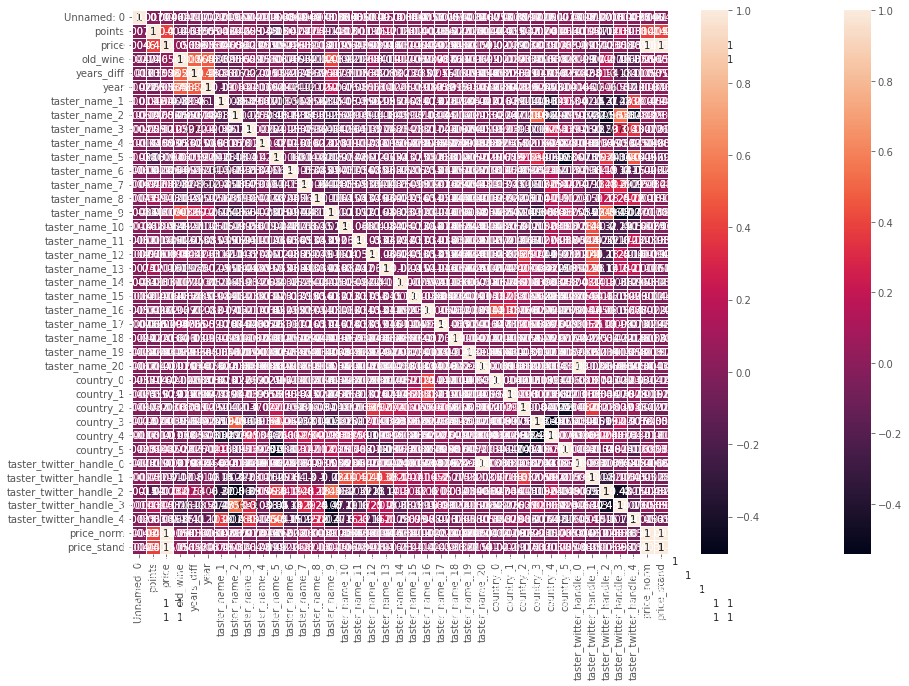

In [123]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(wine_df.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
wine_df = wine_df.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(wine_df.corr(), annot=True, linewidths=.5, ax=ax)